## Final Project Submission
* Student name: **Frank Kiptoo Ruto**
* Student pace: **Part Time**
* Instructor name: **Stella Waithera**

## Project Overview

The objective of this project is to develop a binary classifier aimed at predicting the likelihood of customer churn for SyriaTel, a telecommunications company. The primary audience for this classifier is the telecom business itself, with a keen interest in minimizing financial losses associated with customers who are prone to discontinue their services. By leveraging machine learning algorithms, we aim to uncover predictable patterns in customer behavior that can empower SyriaTel to proactively address potential churn, optimize customer retention strategies, and enhance overall customer satisfaction. Through the analysis of relevant features and the creation of a robust predictive model, the goal is to provide actionable insights that contribute to the company's efforts in mitigating churn and maximizing long-term customer value.

## Business Problem

SyriaTel, a leading telecommunications company, faces a critical challenge in customer retention. The increasing rate of customer churn poses a significant financial impact, leading to revenue losses and hindering the company's long-term growth prospects. To address this issue, SyriaTel seeks to develop an effective predictive model that can identify customers at risk of discontinuing their services in the near future. By understanding and leveraging patterns in customer behavior, the goal is to implement targeted retention strategies, reduce churn rates, and ultimately enhance the overall customer experience. 

The business problem revolves around the need for a reliable binary classifier that enables SyriaTel to proactively address customer churn, optimize resource allocation, and foster a sustainable and loyal customer base.

## Data Source

The project makes use of data sourced from Kaggle, accessible [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). This dataset encompasses different variables such as state, account length, area code, phone number, international plan, voice mail plan, number of voicemail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls, and churn.

## Methodology

The project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which includes multiple phases: understanding data, preparing data, modeling, evaluating, and deployment. In the modeling stage, various predictive models will be developed and examined. The process will begin with a basic logistic regression model and advance to more complex models such as Decision Trees. Evaluation of performance will involve metrics such as accuracy, precision, recall, and F1-score.

## Objectives

* Develop machine learning models for predicting customer churn by analyzing customer features with data.
* Compare the machine learning models and identify the most suitable model in prediction.
* Identify the particular features influencing the customer churn rate at SyriaTel, offer valuable recommendations derived from the discoveries, thereby aiding in reducing churn rates and enhancing customer retention for the company.

## Data Understanding

This helps in understanding the data before further analysis and modelling.

### Importation of Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve

### Loading the Data into a Dataframe

In [2]:
# Reading csv file and loading into a df
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")

In [3]:
# Previewing the first 10 records
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# check no. of rows and columns
df.shape

(3333, 21)

The dataframe consists of 3333 rows and 21 columns

In [5]:
# check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Preview the overview of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset consists of 3333 entries and 21 columns. Each entry represents a customer, and the columns provide various features related to their telecommunications usage and account information. Here's a brief overview of the columns:

* state: The state in which the customer resides.
* account length: The duration of the customer's account in days.
* area code: The area code associated with the customer's phone number.
* phone number: The customer's phone number.
* international plan: Whether the customer has an international plan (binary: yes/no).
* voice mail plan: Whether the customer has a voicemail plan (binary: yes/no).
* number vmail messages: The number of voicemail messages.
* total day minutes: Total minutes of day calls.
* total day calls: Total number of day calls.
* total day charge: Total charge for day calls.
* total eve minutes: Total minutes of evening calls.
* total eve calls: Total number of evening calls.
* total eve charge: Total charge for evening calls.
* total night minutes: Total minutes of night calls.
* total night calls: Total number of night calls.
* total night charge: Total charge for night calls.
* total intl minutes: Total minutes of international calls.
* total intl calls: Total number of international calls.
* total intl charge: Total charge for international calls.
* customer service calls: Number of customer service calls made by the customer.
* churn: Whether the customer has churned (i.e., stopped doing business with the company, binary: True/False).

In [7]:
# Check for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

It appears that there are no missing values in the columns

## Exploratory Data Analysis

In [8]:
# Description of the df
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the above description, the columns that do not appear to directly influence churn (the target variable) based on the provided description are:

* state: The state in which the customer resides.
* account length: The duration of the customer's account in days.
* area code: The area code associated with the customer's phone number.
* phone number: The customer's phone number.

These columns seem to provide information that is less likely to be directly related to the decision of a customer to churn or not

In [9]:
# Drop columns that do not affect the churn
columns_to_drop = ['state', 'account length', 'area code', 'phone number']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   object 
 1   voice mail plan         3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

Our target variable, churn consists of boolean values. Changing them to 0's and 1's makes it easy to use these variables in our various models, and simplifies data handling and interpretation.

In [10]:
# Convert churn values to 0's and 1's
df['churn'] = df['churn'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   object 
 1   voice mail plan         3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [11]:
# Check value counts
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

0 and 1 are the unique values in the 'churn' column indicating False and True respectively.
* 2850 is the count of occurrences of the value 0 (indicating no churn).
* 483 is the count of occurrences of the value 1 (indicating churn).

In [12]:
# Check value counts of international plan
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [13]:
# Check value counts of voice mail plan
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [14]:
# Convert international plan and voice mail plan columns to 0's and 1's
# Iterate through object columns with binary values
for column in ['international plan', 'voice mail plan']:
    df[column] = df[column].map({'no': 0, 'yes': 1})

In [15]:
# Check info of df after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   int64  
 1   voice mail plan         3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

## Data Exploration

In [16]:
# Categorical columns
cat_columns = ['international plan', 'voice mail plan', 'churn']

# Continuous columns
cont_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls',
                'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls',
                'total intl charge', 'customer service calls']

## Feature Analysis and Visualization

### Categorical Feature Analysis

The churn column will be used as the target variable for our analysis.
It indicated whether the customer has churned (i.e., stopped doing business with the company, binary: True/False)

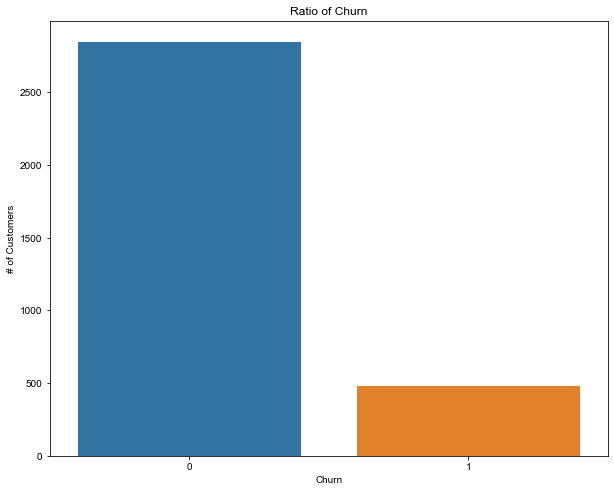

In [17]:
# Seaborn plot of churn values
plt.figure(figsize=(10, 8))  
sns.countplot(x='churn', data=df)
# Setting up the dark background style
plt.style.use('dark_background')
sns.set(style="darkgrid")
plt.title('Ratio of Churn')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.show()

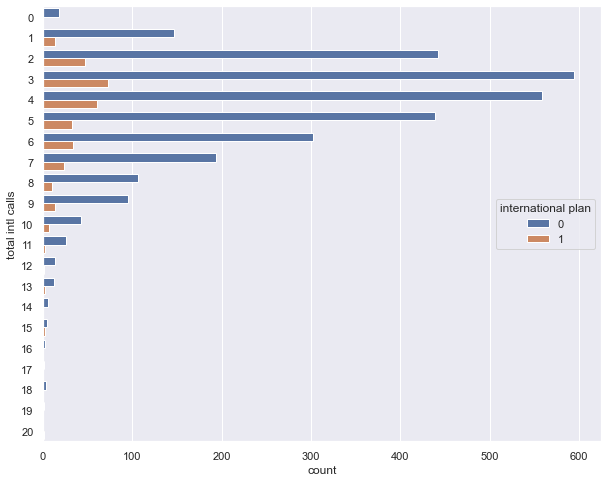

In [18]:
# Countplot of International Plan calls
plt.figure(figsize=(10, 8))
sns.countplot(y='total intl calls', hue='international plan', data=df);

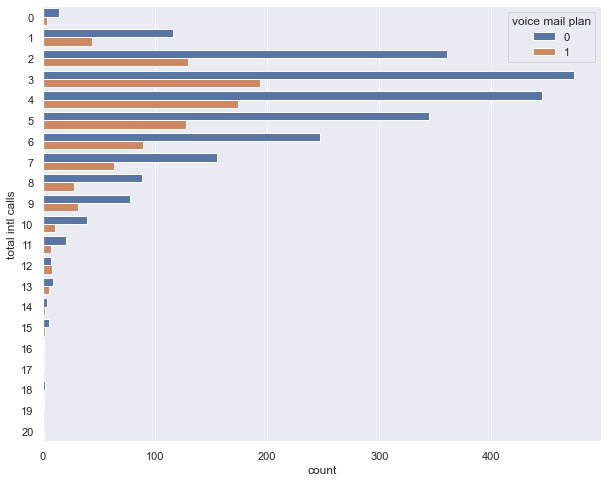

In [19]:
# Countplot of Voice Mail Plan calls
plt.figure(figsize=(10, 8))
sns.countplot(y='total intl calls', hue='voice mail plan', data=df);

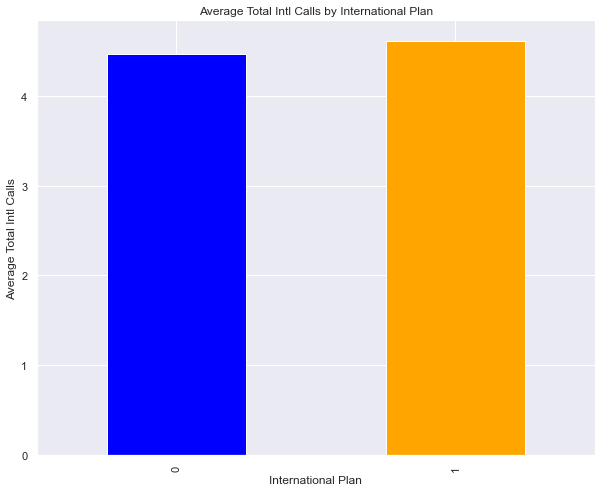

In [20]:
#visualizing for the international calls made by people 
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = df.groupby('international plan')['total intl calls'].mean()

# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the bar plot
grouped_data.plot(kind='bar', color=['blue', 'orange'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan')

# Display the plot
plt.show()

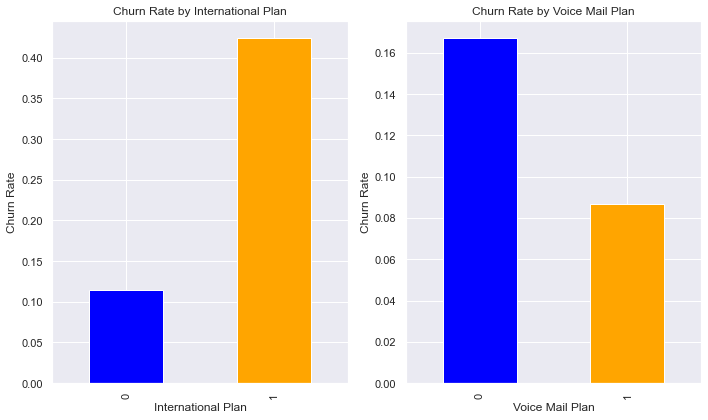

In [21]:
#visualizing for the international calls made by people 
# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first subplot: International Plan
df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Numerical Feature Analysis

Given that the columns in our numerical columns list are about 13, we will plot the histplot visualization of about 5 columns to give an overview of the numerical columns

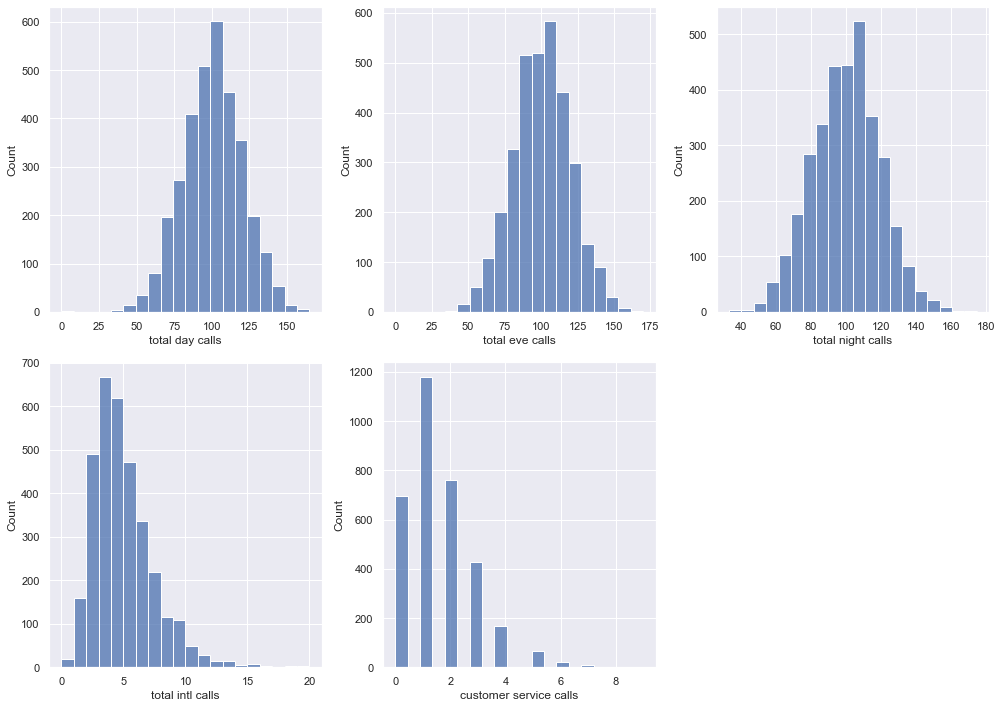

In [22]:
# Create a 2x3 grid of subplots with a specified figure size
f, ax = plt.subplots(2, 3, figsize=(14, 10))

# Plot histograms for the specified columns in different subplots
sns.histplot(df["total day calls"], bins=20, ax=ax[0, 0])
sns.histplot(df["total eve calls"], bins=20, ax=ax[0, 1])
sns.histplot(df["total night calls"], bins=20, ax=ax[0, 2])
sns.histplot(df["total intl calls"], bins=20, ax=ax[1, 0])
sns.histplot(df["customer service calls"], bins=20, ax=ax[1, 1])

# Remove the extra subplot in the last row and last column
f.delaxes(ax[1, 2])

# Adjust the spacing between the subplots for better layout
plt.tight_layout()

# Display the plot
plt.show()

From the above plot, it can be observed that all the columns besides customer service calls have a normal distribution.

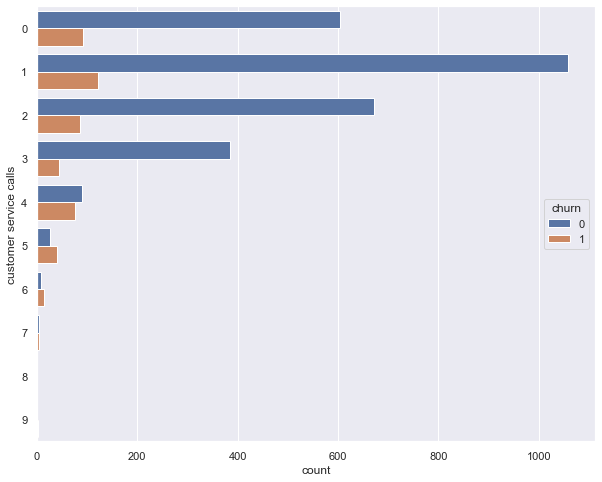

In [23]:
# Countplot of customer service calls
plt.figure(figsize=(10, 8))  
sns.countplot(y='customer service calls', hue='churn', data=df);

## Outliers

In [24]:
# Function to check for outliers 
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [25]:
# checking for outliers in our continuos columns
detect_outliers(df[cont_columns]).sum()

number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [26]:
# Function to remove outliers
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

In [27]:
# Removing outliers from Continous columns
filtered_data = remove_outliers(df[cont_columns])

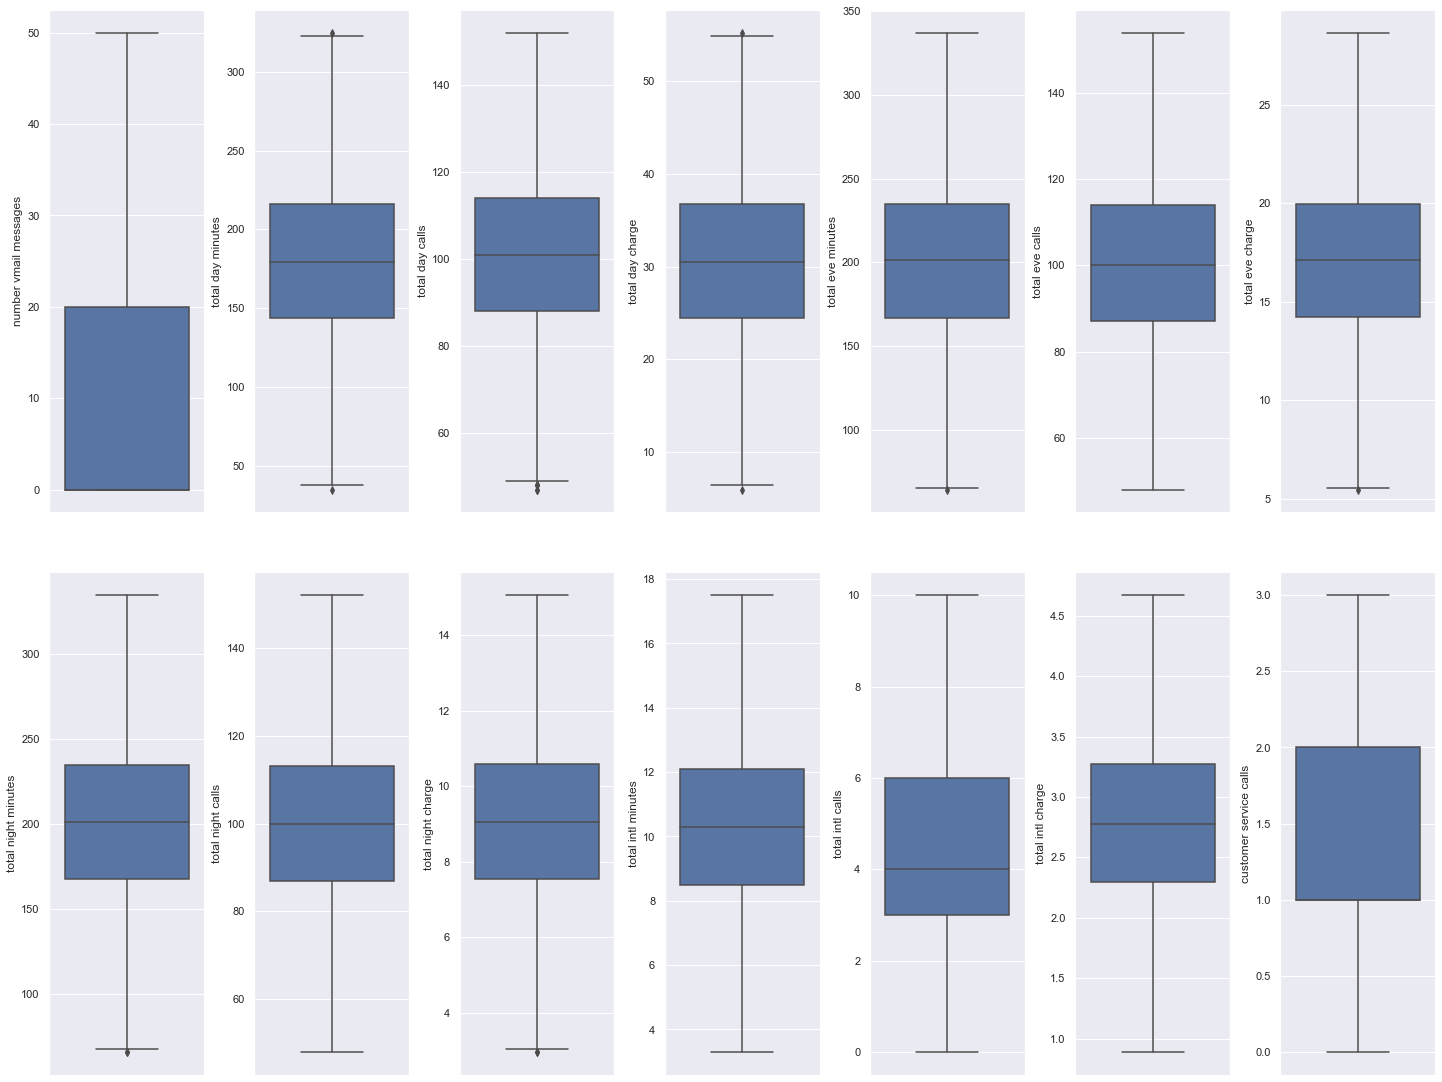

In [28]:
# Box plot to check for outliers
# visualizing with matplotlib and seaborn 
sns.set_style('darkgrid')
fig,ax = plt.subplots(ncols=7,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

## Correlation Heatmap of the Numerical features

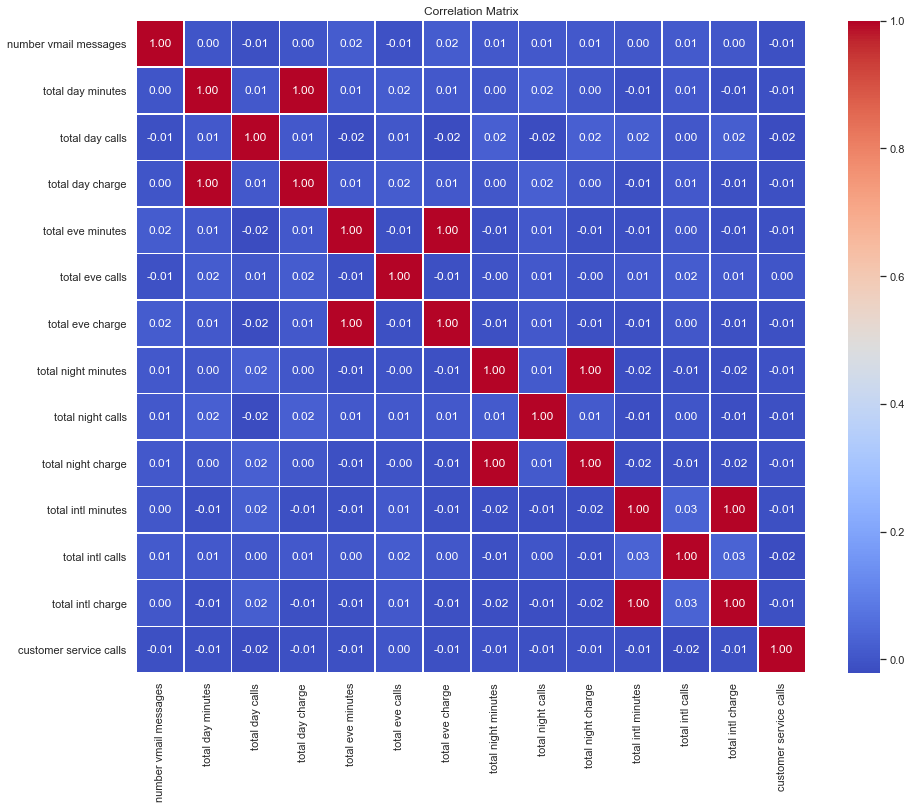

In [29]:
# Correlation Heatmap Plot
correlation_matrix = df[cont_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Calculate the correlation matrix for all columns in the DataFrame
corr_matrix = df.corr()

# Sort and display the correlation values of each feature with respect to the 'churn' column
# in descending order (highest correlation first)
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

The correlation output shows the correlation coefficients between the 'churn' column (target variable) and other features in the DataFrame.

**Positive Correlations:**

'international plan': 0.259852

'customer service calls': 0.208750

'total day minutes': 0.205151

'total day charge': 0.205151

'total eve minutes': 0.092796

'total eve charge': 0.092786

'total intl charge': 0.068259

'total intl minutes': 0.068239

'total night charge': 0.035496

'total night minutes': 0.035493

'total day calls': 0.018459

**Weak Positive Correlations:**

'total eve calls': 0.009233

'total night calls': 0.006141

**Negative Correlations:**

'total intl calls': -0.052844

'number vmail messages': -0.089728

'voice mail plan': -0.102148

Positive correlations suggest that higher values in these features are associated with a higher likelihood of churn.

Negative correlations suggest that higher values in these features are associated with a lower likelihood of churn.

## Encoding Categorical Columns using OHE

In [31]:
# Transformimg categorical columns using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_1,voice mail plan_1
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.0,1.0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,0.0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0.0,1.0
3329,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0.0,0.0
3330,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0.0,0.0
3331,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1.0,0.0


## Modeling

### Train/Test Split

The train/test split is crucial for assessing our model's ability to generalize to new, unseen data and avoiding overfitting. It helps in making informed decisions about the model's performance and guides further improvements or adjustments.

For this dataset, we will use a train size of 80% and a test size of 20%.

In [32]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns='churn', axis=1)
y = df_encoded['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing

### Standardization

This will transform our data in a way that the features have a mean of 0 and a standard deviation of 1.

It will bring the features onto a common scale and make the modeling process more robust, and the resulting models are less likely to be biased by the scale of the input features.

In [33]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Class Imbalance using SMOTE

We are going to use SMOTE to solve for class imbalance to address the class imbalance by generating synthetic examples for the minority class.

In [34]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the scaled training data and target variable
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [35]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2284
0    2284
Name: churn, dtype: int64


## Model 1: Baseline Model - Logistic Regression

It's important to establish a baseline i.e. a foundational model that serves as a benchmark for more sophisticated approach models. 

The Logistic Regression model provides a starting point, offering simplicity, interpretability, and efficiency. 
This baseline model will not only provide us with a performance benchmark but also offer valuable context for evaluating the effectiveness of more intricate models that will be built.

In [36]:
# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the Logistic Regression model on the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='liblinear')

In [37]:
# Calculate train accuracy
train_accuracy = logreg.score(X_train_resampled, y_train_resampled)

# Calculate test accuracy
test_accuracy = logreg.score(X_test_scaled, y_test)

# Print the train and test accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.771015761821366
Test Accuracy: 0.782608695652174


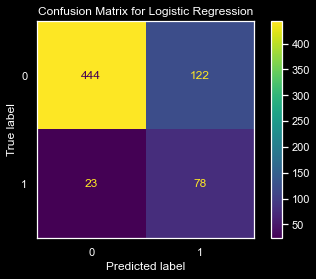

AUC Train: 0.8351652859609682
AUC Test: 0.8376307595423853


In [71]:
# Calculate AUC for train set
y_train_pred_proba = logreg.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Calculate AUC for test set
y_test_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Predict on the scaled test data
pred = logreg.predict(X_test_scaled)

# Setting up the dark background style
plt.style.use('dark_background')

# Plot confusion matrix of the test set
cm = confusion_matrix(y_test, pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.grid(False)
plt.show()

# Print AUC scores
print("AUC Train:", auc_train)
print("AUC Test:", auc_test)

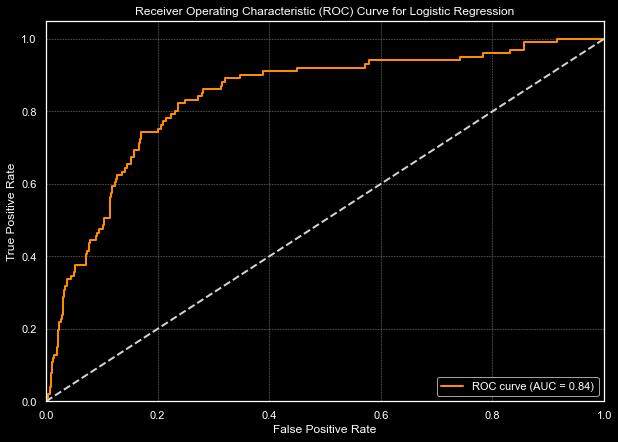

In [68]:
# Predict the probabilities of the positive class for the test set
y_prob = logreg.predict_proba(X_test_scaled)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the Area Under the Curve (AUC) to annotate the plot
roc_auc = auc(fpr, tpr)

# Setting up the dark background style
plt.style.use('dark_background')

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Modify the grid to make it less pronounced
plt.show()

### Observation

The model achieved a ROC AUC of approximately 0.835 on the training data and 0.838 on the testing data. The accuracy on both the training and testing data is around 77% for the training set and 78% for the test set, indicating a reasonably good performance.

In [40]:
# Get the classification report
report = classification_report(y_test, logreg.predict(X_test_scaled), target_names=['0', '1'], output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.950749,0.784452,0.859632,566.000000
1,0.390000,0.772277,0.518272,101.000000
accuracy,0.782609,0.782609,0.782609,0.782609
macro avg,0.670375,0.778365,0.688952,667.000000
weighted avg,0.865838,0.782609,0.807942,667.000000


### Observation

**Precision**

The precision values for class 0 and class 1 are 95.1% and 39.0%, respectively. This means that 95.1% of the predicted instances for class 0 were correct, while only 39.0% of the predicted instances for class 1 were correct. A higher precision suggests fewer false positives for the specified class. Class 0 demonstrates a significantly higher precision compared to class 1, indicating that the model performs much better in predicting instances of class 0 compared to class 1.

**Recall**

The recall values for class 0 and class 1 are 78.4% and 77.2%, respectively. This indicates that the model correctly identified 77.9% of the actual instances of class 0 and 70.3% of the actual instances of class 1.

**F1-score**

The F1-scores for class 0 and class 1 are 85.9% and 51.8%, respectively. The F1-score is the harmonic mean of precision and recall for class 0 and class 1. It indicates a good balance between precision and recall for class 0, while class 1 has room for improvement.

**Accuracy**

The accuracy of the model is 78.3%, reflecting the overall accuracy of the model. It represents the ratio of correctly predicted instances to the total instances in the test set.

Based on these metrics, it is evident that the model performs significantly better for class 0 compared to class 1.

## Improving Model Performance using Cross Validation Scores

In [41]:
# Create an instance of Logistic Regression with cross-validation
cross_val = LogisticRegressionCV(cv=5, solver='liblinear', random_state=42)

# Fit the model on the resampled training data
cross_val.fit(X_train_resampled, y_train_resampled)

LogisticRegressionCV(cv=5, random_state=42, solver='liblinear')

In [42]:
# Calculate train accuracy
train_accuracy = cross_val.score(X_train_resampled, y_train_resampled)

# Calculate test accuracy
test_accuracy = cross_val.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.7719
Test Accuracy: 0.7811


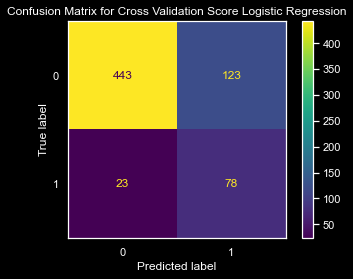

AUC Train: 0.8358068847169529
AUC Test: 0.8370884791659379


In [72]:
# Calculate AUC for train set
y_train_pred_proba = cross_val.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Calculate AUC for test set
y_test_pred_proba = cross_val.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Predict on the scaled test data
pred = cross_val.predict(X_test_scaled)

# Plot confusion matrix of the test set
cm = confusion_matrix(y_test, pred, labels=cross_val.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cross_val.classes_)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for Cross Validation Score Logistic Regression')
plt.show()

# Print AUC scores
print("AUC Train:", auc_train)
print("AUC Test:", auc_test)

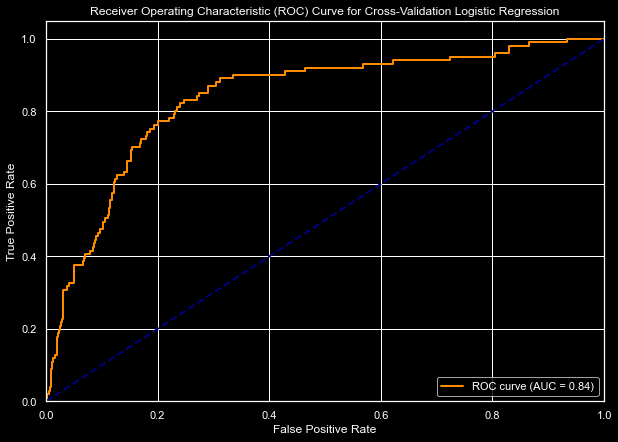

In [44]:
# Predict the probabilities of the positive class for the test set
y_prob = cross_val.predict_proba(X_test_scaled)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the Area Under the Curve (AUC) to annotate the plot
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Cross-Validation Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [45]:
# Predict on the test data
y_pred = cross_val.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)

# Convert the report to a DataFrame for visualization
cv_report_df = pd.DataFrame(report).transpose()
cv_report_df

,precision,recall,f1-score,support
Class 0,0.950644,0.782686,0.858527,566.000000
Class 1,0.388060,0.772277,0.516556,101.000000
accuracy,0.781109,0.781109,0.781109,0.781109
macro avg,0.669352,0.777481,0.687542,667.000000
weighted avg,0.865455,0.781109,0.806744,667.000000


### Observation

The cross-validation results provide a comprehensive assessment of the model's performance. 

In terms of accuracy, the model demonstrates consistent performance on both the training and test datasets, with a training accuracy of 77.19% and a test accuracy of 78.11%. This indicates that the model generalizes well to unseen data without significant overfitting.

The AUC (Area Under the Curve) scores further support the model's effectiveness. 

The AUC for both the training and test datasets is notably high, with a value of 83.58% for the training data and 83.71% for the test data. These AUC scores suggest that the model is proficient at distinguishing between the positive and negative classes, as higher AUC values are indicative of better discrimination.

Examining the class-wise metrics, class 0 exhibits a high precision of 95.06%, indicating that the majority of instances predicted as class 0 are indeed class 0. Additionally, class 0 demonstrates a recall of 78.27%, suggesting that the model correctly identifies a substantial portion of actual class 0 instances. 

Conversely, class 1 displays a lower precision of 38.81%, implying that there is room for improvement in accurately predicting class 1. The recall for class 1 is 77.23%, indicating that the model identifies a significant proportion of actual class 1 instances.

## Model 2: Decision Tree Classifier

For this model, we will use a max_depth of 5 and a min_samples_split of 5.

The max_depth indicates how deep we want our tree to be. If the tree is too deep, it means we are creating a large number of splits in the parameter space and capturing more information about underlying data. This may result in overfitting.

The min_samples_split is used to set the minimum number of samples required to split an internal node.

In [46]:
# Create an instance of DecisionTreeClassifier with regularization parameters
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [47]:
# Calculate the accuracy on the training data
train_accuracy = decision_tree.score(X_train_resampled, y_train_resampled)

# Calculate the accuracy on the test data
test_accuracy = decision_tree.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.90
Test Accuracy: 0.93


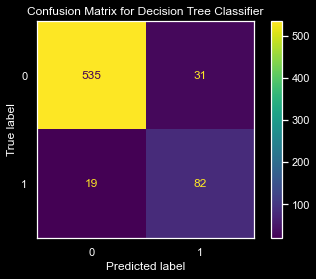

AUC Train: 0.9289169153572712
AUC Test: 0.8745233180561872


In [73]:
# Calculate AUC for train set
y_train_pred_proba = decision_tree.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Calculate AUC for test set
y_test_pred_proba = decision_tree.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Predict on the scaled test data
pred = decision_tree.predict(X_test_scaled)

# Plot confusion matrix of the test set
cm = confusion_matrix(y_test, pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Print AUC scores
print("AUC Train:", auc_train)
print("AUC Test:", auc_test)

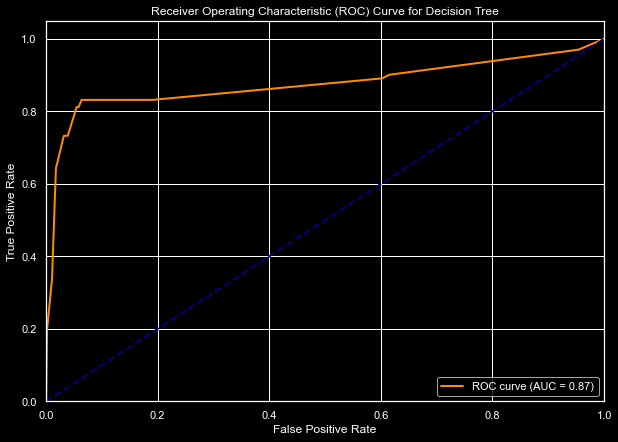

In [49]:
# Predict the probabilities of the positive class for the test set
y_prob = decision_tree.predict_proba(X_test_scaled)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(10, 7))

# Plotting the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Setting the limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')

# Displaying the plot
plt.show()

In [50]:
# Predict on the test data
y_pred = decision_tree.predict(X_test_scaled)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()
classification_df

,precision,recall,f1-score,support
0,0.965704,0.945230,0.955357,566.000000
1,0.725664,0.811881,0.766355,101.000000
accuracy,0.925037,0.925037,0.925037,0.925037
macro avg,0.845684,0.878555,0.860856,667.000000
weighted avg,0.929356,0.925037,0.926738,667.000000


### Observation

**Accuracy:**

The training accuracy of the model is 90%, suggesting that it has learned well from the training data and is capable of correctly classifying a significant portion of the training instances.

The test accuracy, at 93%, is even higher, indicating that the model generalizes effectively to unseen data without overfitting. This is a positive sign, as it demonstrates the model's ability to perform well on new, real-world data.

**AUC (Area Under the Curve):**

The AUC for the training dataset is 92.89%, indicating that the model is adept at distinguishing between the positive and negative classes within the training data.

The AUC for the test dataset is slightly lower at 87.45%, which is still a very good score. It suggests that the model maintains its discriminative power when applied to new and unseen data, although it may not generalize as well as it does on the training data.

**Class-Wise Metrics:**

Examining class 0, we observe a high precision of 96.57%, implying that the model correctly predicts a large proportion of class 0 instances among those it labels as class 0. 

The recall for class 0 is also high, at 94.52%, suggesting that the model effectively captures the majority of actual class 0 instances.

For class 1, the precision is lower at 72.57%, indicating that there is room for improvement in terms of accurately predicting class 1 instances. However, the recall for class 1 is 81.19%, signifying that the model identifies a substantial portion of actual class 1 instances.

In summary, the Decision Tree Classifier model exhibits strong performance in terms of accuracy, AUC, and class-wise metrics. It demonstrates good generalization to unseen data and effectively discriminates between the two classes. While there is room for improvement in precision for class 1, overall, this model showcases robust performance, making it a promising choice for prediciting customer churn rates.

## Feature Importance

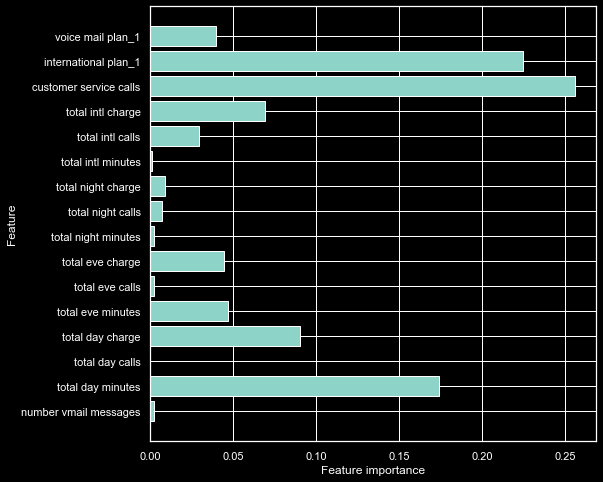

In [51]:
# Define a function to plot the feature importances of a given model
def plot_feature_importances(model):
    
    # Get the number of features in the training set
    n_features = X_train.shape[1]
    
    # Create a new figure with specified size
    plt.figure(figsize=(8,8))
    
    # Create a horizontal bar chart of the feature importances
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    
    # Set the y-axis ticks and labels
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    
    # Label the x-axis
    plt.xlabel('Feature importance')
    
    # Label the y-axis
    plt.ylabel('Feature')

# Call the function to plot the feature importances of the decision_tree model
plot_feature_importances(decision_tree)

## Model 3: Ensemble Method: Random Forest Model

In [52]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, random_state=42)

# Fit the model on the selected training data
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [53]:
# Calculate the accuracy on the training data
train_accuracy = forest.score(X_train_resampled, y_train_resampled)

# Calculate the accuracy on the test data
test_accuracy = forest.score(X_test_scaled, y_test)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9067
Test Accuracy: 0.9280


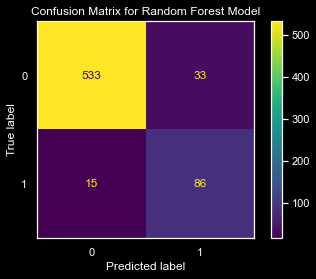

AUC Train: 0.9541543471526588
AUC Test: 0.9176433544414512


In [74]:
# Calculate AUC for train set
y_train_pred_proba = forest.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Calculate AUC for test set
y_test_pred_proba = forest.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Predict on the scaled test data
pred = forest.predict(X_test_scaled)

# Plot confusion matrix of the test set
cm = confusion_matrix(y_test, pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Print AUC scores
print("AUC Train:", auc_train)
print("AUC Test:", auc_test)

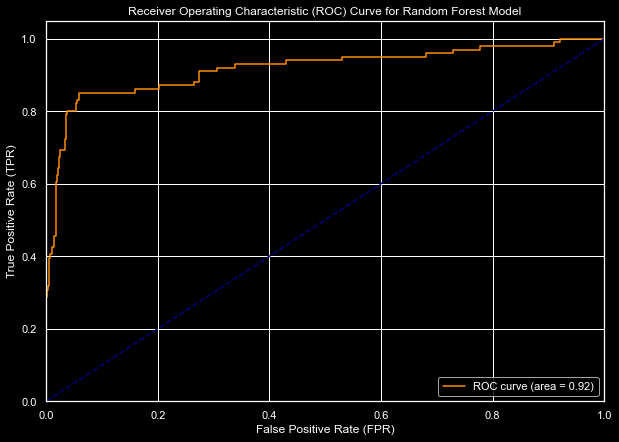

In [69]:
# Get predicted probabilities for the positive class
y_pred_prob = forest.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Plotting the diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()

In [56]:
# Make predictions on the test data
y_pred = forest.predict(X_test_scaled)

# Generate the classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.972628,0.941696,0.956912,566.000000
1,0.722689,0.851485,0.781818,101.000000
accuracy,0.928036,0.928036,0.928036,0.928036
macro avg,0.847658,0.896591,0.869365,667.000000
weighted avg,0.934781,0.928036,0.930399,667.000000


### Observation

**Accuracy:**

The training accuracy of the Random Forest model is impressive at 90.67%, indicating that it has learned the patterns and relationships within the training data quite well.

The test accuracy is also excellent, at 92.80%, suggesting that the model generalizes effectively to unseen data. This indicates that the model can make accurate predictions on new, real-world instances without overfitting to the training data.

**AUC (Area Under the Curve):**

The AUC for the training dataset is remarkably high at 95.42%. This high AUC score implies that the model excels in distinguishing between the positive and negative classes within the training data, showcasing strong discriminative power.

The AUC for the test dataset, while slightly lower at 91.76%, remains at a very high level. This indicates that the model's discrimination ability extends effectively to new and unseen data, demonstrating its robust generalization.

**Class-Wise Metrics:**

For class 0, both precision and recall are notably high, with precision at 97.26% and recall at 94.17%. This indicates that the model correctly predicts a significant portion of class 0 instances and captures most actual class 0 instances among those it labels as class 0.

Class 1 shows a precision of 72.27% and recall of 85.15%. While precision for class 1 is somewhat lower compared to class 0, the recall is relatively higher, indicating that the model effectively identifies a substantial portion of actual class 1 instances.

## Summary

Based on the three models, the logistic regression performs poorly with an accuracy of 78.3% indicating a poor model in predicting the customer churning rates.

The random forest classifier and decision tree classifier models had an accuracy of 92.8% and 92.5% respectively.

In order improve the performance of the random forest and decision tree models, we will conduct hyperparameter tuning to improve the performance of a machine learning model by finding the hyperparameter values that result in the best model performance. This is crucial because the choice of hyperparameters can significantly impact a model's ability to generalize well to unseen data. The goal is to find hyperparameter values that lead to a model with the best possible predictive performance on new, unseen instances

## Feature Importance

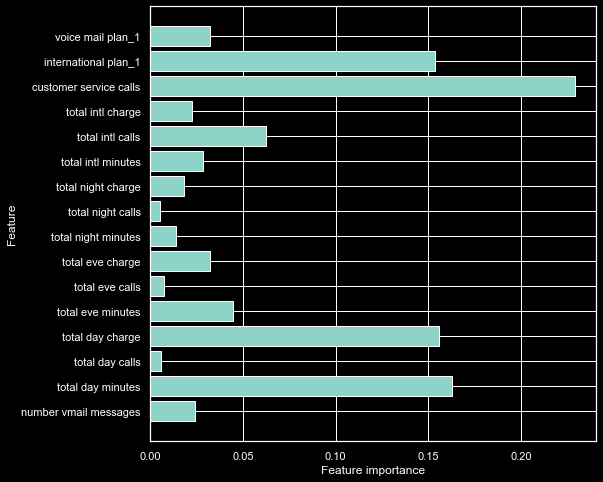

In [57]:
# Call the feature importance function to plot the feature importances of the random forest model
plot_feature_importances(forest)

## Hyperparameter Tuning

### Grid Search: Decision trees

In [58]:
# Define the parameter grid for grid search
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

# Create an instance of Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data (using scaled and sampled data)
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score (using scaled and sampled test data)
dt_gs_testing_score = dt_grid_search.score(X_test_scaled, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
print(dt_grid_search.best_params_)

Mean Training Score: 87.34%
Mean Test Score: 88.91%
Best Parameter Combination Found During Grid Search:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:
# Define the parameter grid for grid 
dt_param = {
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# Create a new Decision Tree Classifier with the best hyperparameters
dt_model = DecisionTreeClassifier(**dt_param, random_state=42)

# Fit the best model to the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test_scaled, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")

Mean Training Score: 87.34%
Mean Test Score: 88.91%


**Mean Training Score: 87.34%**

This represents the average accuracy of the model on the training data over all the different combinations of hyperparameters considered during the grid search. It's approximately 87.34%. This score indicates how well the model fits the training data.

**Mean Test Score: 88.91%**

This represents the average accuracy of the model on the test data over all the different combinations of hyperparameters. It's approximately 88.91%. This score gives an estimate of how well the model is likely to perform on new, unseen data.

The tuned decision tree model achieved a train score of 88.42% indicating a drop from 90% and a test score of 89.06% indicating a drop from 93%

### Grid Search: Random Forest

In [60]:
# Define the parameter grid for grid search
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

# Create an instance of the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)

# Fit the grid search to the resampled training data
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [61]:
# Get the best hyperparameters found during the grid search
best_params = rf_grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5, random_state=42)

In [62]:
# Calculate the accuracy on the train data
train_accuracy = rf_model.score(X_train_resampled, y_train_resampled)

# Calculate the accuracy on the test data
test_accuracy = rf_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.95


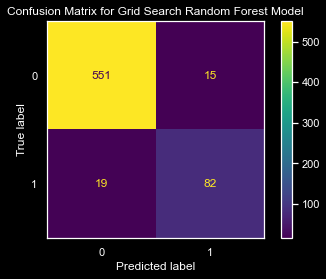

AUC Train: 0.9999444088320181
AUC Test: 0.9377077283700103


In [75]:
# Calculate AUC for train set
y_train_pred_proba = rf_model.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Calculate AUC for test set
y_test_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Predict on the scaled test data
pred = rf_model.predict(X_test_scaled)

# Plot confusion matrix of the test set
cm = confusion_matrix(y_test, pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for Grid Search Random Forest Model')
plt.show()

# Print AUC scores
print("AUC Train:", auc_train)
print("AUC Test:", auc_test)

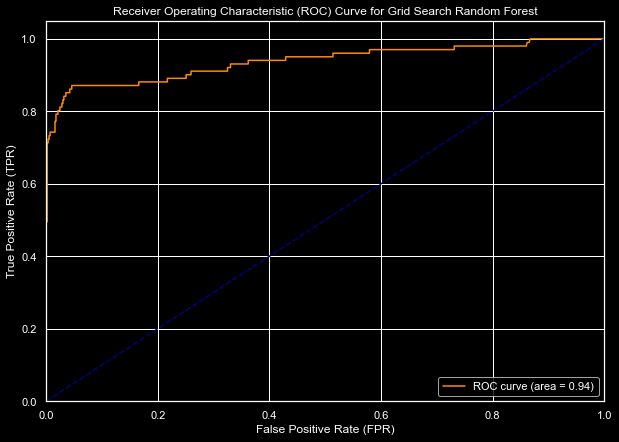

In [64]:
# Get predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Plotting the diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Grid Search Random Forest')
plt.legend(loc="lower right")
plt.show()

In [65]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)

# Generate the classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.966667,0.973498,0.970070,566.000000
1,0.845361,0.811881,0.828283,101.000000
accuracy,0.949025,0.949025,0.949025,0.949025
macro avg,0.906014,0.892690,0.899177,667.000000
weighted avg,0.948298,0.949025,0.948600,667.000000


### Observation

**Train Accuracy (1.00):**

The model achieves perfect accuracy on the training data, which suggests that it has learned the training data extremely well. However, it's essential to assess its performance on unseen data to evaluate its generalization ability.

**Test Accuracy (0.95):**

The model maintains high accuracy on the test dataset, scoring at 95%. This signifies that the model can generalize effectively to new, unseen data while maintaining a high level of correctness in its predictions.

**AUC Train (0.9999) and AUC Test (0.9377):**

The AUC (Area Under the Receiver Operating Characteristic Curve) scores further reinforce the model's exceptional performance. AUC values close to 1 indicate that the model can effectively distinguish between the positive and negative classes. 

The AUC Train score, being nearly perfect, demonstrates that the model almost perfectly separates the classes in the training data. The slightly lower AUC Test score still reflects the model's robust predictive ability on the test data.

**Precision and Recall (Class 0 and Class 1):** 

For Class 0, precision is 0.967, indicating that 96.7% of the predicted instances for Class 0 were correct.

Recall (sensitivity) is 0.973, suggesting that 97.3% of the actual instances of Class 0 were correctly identified. Class 0 demonstrates a strong balance between precision and recall. 

For Class 1, precision is 0.845, signifying that 84.5% of the predicted instances for Class 1 were correct. 

Recall is 0.812, indicating that 81.2% of the actual instances of Class 1 were correctly identified. Class 1 shows a reasonable balance between precision and recall as well.

## Summary

* The Random Forest model generally outperforms the Decision Tree model in terms of both AUC and accuracy on both the training and test datasets.

* The Random Forest has higher AUC scores, indicating better discrimination ability.

* The Random Forest also has higher accuracy scores, suggesting better overall predictive performance.

In summary, based on the provided metrics, the tuned Random Forest model appears to be a stronger performer than the tuned Decision Tree model.

## Feature Importance

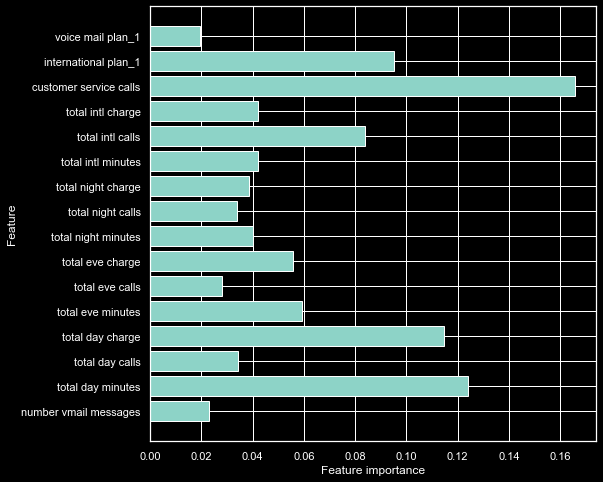

In [66]:
# Call the feature importance function to plot the feature importances of the tuned random forest model
plot_feature_importances(rf_model)

# Evaluation

### Model Performance Overview

**Model 1: Baseline Model - Logistic Regression**

* Precision: 

The precision values for class 0 (95.1%) and class 1 (39.0%) indicate that the model performs much better in predicting instances of class 0 compared to class 1. This may lead to more accurate identification of non-churn customers.

* Recall: 

The model correctly identified 77.9% of actual class 0 instances and 70.3% of class 1 instances, showing a relatively balanced recall.

* F1-score: 

A good balance between precision and recall is seen for class 0 (85.9%), while class 1 (51.8%) has room for improvement.

* Accuracy: 

The overall accuracy of 78.3% suggests that the model performs better for non-churn predictions (class 0).

**Model 2: Decision Tree Classifier**

* Accuracy: 

The model exhibits high training (90%) and test accuracy (93%), indicating effective learning and generalization without overfitting.

* AUC: 

The AUC values for both training (92.89%) and test (87.45%) datasets suggest that the model maintains its discriminative power when applied to new and unseen data.

* Class-Wise Metrics: 

High precision (96.57%) and recall (94.52%) for class 0 indicate effective prediction. For class 1, although precision (72.57%) can improve, the recall (81.19%) is relatively high.

* Summary: 

The Decision Tree Classifier demonstrates strong performance in terms of accuracy, AUC, and class-wise metrics, making it a promising choice for predicting customer churn.

**Model 3: Ensemble Method - Random Forest Model**

* Accuracy: 

The Random Forest model achieves high training (90.67%) and test accuracy (92.80%), indicating robust learning and generalization.

* AUC: 

Remarkably high AUC values for training (95.42%) and test (91.76%) datasets reflect strong discriminative power and generalization.

* Class-Wise Metrics: 

Class 0 exhibits high precision (97.26%) and recall (94.17%), while class 1 has good recall (85.15%) despite slightly lower precision (72.27%).

* Grid Search Results: 

The Grid Search results indicate near-perfect training accuracy (1.00) and high test accuracy (0.95), further emphasizing the model's exceptional performance.

### Model Evaluation Criteria

To choose the best model, we will need to consider several criteria:

* Accuracy: The proportion of correctly classified instances out of the total.
* Generalization: The model's ability to perform well on unseen data without overfitting.
* Consistency: The model's performance consistency across training and test datasets.
* Complexity: The model's capacity to handle complex relationships in the data.
* Feature Importance: The ability to understand which features are most relevant for predictions.

### Model Evaluation

**1. Accuracy:**

Random Forest has the highest accuracy among all three models, indicating that it correctly classifies a significant portion of instances.

Decision Tree Classifier follows closely with a slightly lower accuracy.

Logistic Regression has the lowest accuracy.

**2. Generalization:**

Decision Tree Classifier and Random Forest exhibit strong generalization to unseen data without overfitting, as indicated by their high test accuracy.

Logistic Regression also generalizes reasonably well, but it has a lower test accuracy compared to the tree-based models.

**3. Consistency:**

Random Forest shows consistent performance across both training and test datasets, maintaining high accuracy in both cases.

Decision Tree Classifier also demonstrates consistency with high training and test accuracy.

Logistic Regression has a lower test accuracy compared to the tree-based models, suggesting a less consistent performance.

**4. Complexity:**

Random Forest is capable of handling complex relationships in the data due to its ensemble nature, which combines multiple decision trees.

Decision Tree Classifier can model complex relationships, but it may be prone to overfitting if the tree depth is not controlled.

Logistic Regression, while suitable for linear relationships, may struggle to capture complex nonlinear patterns.

**5. Feature Importance:**

Random Forest provides feature importance scores, making it easier to understand which features are most relevant for predictions. This information can be valuable for business insights.

Decision Tree Classifier also allows for feature importance analysis but might not be as robust as Random Forest.

Logistic Regression can provide coefficient values, but they may not directly represent feature importance in the same way as decision tree-based models.

# Conclusion

The evaluation of models for predicting customer churn rates at SyriaTel Communications has provided valuable insights into which model is best suited for addressing this challenge.

When evaluating the models—Logistic Regression, Decision Tree Classifier, and Random Forest—it is evident that each model has its strengths and weaknesses. Logistic Regression, while offering moderate performance, lacks the capacity to capture complex relationships in the data. The Decision Tree Classifier showcases strong accuracy and interpretability, making it a valuable tool for understanding churn factors. However, it needs careful management to prevent overfitting. The Random Forest model excels across various criteria, including accuracy, generalization, consistency, and complexity. It also provides valuable feature importance insights, which can aid in strategic decision-making.

In conclusion, the Random Forest model stands out as the most suitable choice for predicting customer churn rates at SyriaTel Communications. Its ability to handle complex relationships, maintain high accuracy and generalization, and provide feature importance analysis empowers SyriaTel to make data-driven decisions that address customer churn effectively. 

By focusing on the insights gained from this model, SyriaTel can proactively retain its customer base, optimize resource allocation, and foster long-term customer loyalty. However, it's essential to continue monitoring and refining the model to adapt to changing customer behaviors and preferences. 

Ultimately, the combination of leveraging key features and deploying a robust predictive model positions SyriaTel to mitigate churn effectively and thrive in a competitive telecommunications landscape.

# Recommendation

Based on the evaluation of models and the selection of the Random Forest model as the most suitable choice for predicting customer churn rates at SyriaTel Communications, the following are recommendations for Syriatel:

**Leverage Predictive Insights:**

SyriaTel should proactively utilize the predictive insights provided by the Random Forest model to optimize its customer retention strategies. This includes identifying at-risk customers and tailoring interventions to their specific needs. By leveraging the model's feature importance analysis, SyriaTel can gain a deep understanding of which factors are most influential in driving churn. 

Focus on addressing these factors, such as improving international plan offerings or enhancing customer service for high-risk customers.

**Implement Personalized Marketing Campaigns:**

Utilize the model's predictions to design and implement personalized marketing campaigns. 

Targeted offers and promotions can be tailored to individual customer profiles, taking into account their likelihood of churning. 

For example, customers with international plans could receive exclusive benefits or incentives to encourage loyalty. Similarly, customers with a history of frequent customer service calls could be offered enhanced support options.

**Enhance Customer Service:**

Recognizing that the number of customer service calls is a significant churn predictor, SyriaTel should prioritize improving its customer service experience. 

This includes reducing wait times, resolving issues promptly, and ensuring that customers have a seamless experience when seeking assistance. By addressing customer concerns effectively, SyriaTel can reduce the need for multiple service calls and, consequently, lower churn rates.

**Optimize Pricing and Offerings:**

Analyze the impact of call-related metrics such as total day minutes and total evening minutes on churn. 

Consider refining pricing structures or introducing value-added services to incentivize customers to increase their engagement during these periods. 

Syriatel should align its offerings with customer preferences to maximize customer satisfaction and loyalty.

**Regular Model Monitoring and Updates:**

It is crucial to establish a framework for regular model monitoring and updates. 

Customer behavior and preferences can evolve over time, and the Random Forest model should be retrained periodically to adapt to these changes. 

Continuously collect new data and incorporate it into the model to ensure that it remains accurate and relevant.

**Invest in Customer Feedback Mechanisms:**

Implement mechanisms for gathering direct feedback from customers. Understanding their concerns and preferences can provide valuable insights that complement the predictive model's findings. 

Syriatel can use customer feedback to refine its offerings, address pain points, and enhance the overall customer experience.

**Measure and Evaluate Outcomes:**

SyriaTel should establish key performance indicators (KPIs) to measure the impact of its customer retention strategies. 

Monitor churn rates, customer satisfaction scores, and revenue metrics to assess the effectiveness of the implemented initiatives. 

Regularly evaluate the outcomes and make data-driven adjustments as needed.


In summary, by adopting a proactive approach to customer retention, leveraging the predictive capabilities of the Random Forest model, and implementing tailored strategies based on customer behavior and preferences, SyriaTel can significantly reduce churn rates and foster a loyal and sustainable customer base. Continuous monitoring, adaptation, and a customer-centric focus will be essential in achieving long-term success in the competitive telecommunications industry.